# ADS 2017. Homework 1

### Question (1): (10pt)

Suppose that the independent variable $x$ has n observations: $(x_1,x_2,...x_n)$ and the dependent variable $y$ has corresponding observations: $(y_1, y_2,...,y_n)$. If the correlation between these two sequences $corr(x,y)=0.02$, which of the following statements are true? Please select all the right answers.

(a) There should be no strong relation between $x$ and $y$.

(b) If we build a linear regression between $y$ and $x$ as $y=wx$, we could conclude that the OLS estimation for $w$ should be around 0.02.

(c) There could be some strong linear relationship between $x$ and $y$.

(d) Certain relation between $x$ and $y$ could still exist, but it should be non-linear.

### Answer: (d)

### Question (2): (10pt)



Consider a model

$y=x^{b}$ where $b>0$. 

Now, suppose x triples (originally $x>0$). How would y change with respect to this change of x? Let us denote new $y$ as $y'$. Please select all the right answers from below. 

(a) $y'<3y$ if b is less than one.

(b) $y'=3y$ in any case.

(c) $y'$ increases by $(2^b-1)*100\%$.

(d) $y'>3y$ if b is bigger than one.

### (a)(d)

In [2]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pylab as plt
%matplotlib inline


### Question (3): (30 pt)


In [2]:
x=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [3]:
y=[14.0, 12.0, 18.0, -4.0, 14.0, 35.0, 45.0, 30.0, 50.0, 54.0, 58.0, 
   55.0, 57.0, 62.0, 61.0, 83.0, 85.0, 106.0, 105.0, 104.0]

#### (a) Calculate corr(x,y) without using a build-in function for the correlation coefficient.

In [4]:
X = np.array(x)
Y = np.array(y)
XY = X * Y

correlation_XY = (np.mean(XY) - np.mean(X) * np.mean(Y)) / ( np.std(X) * np.std(Y) )
print("corr(x,y) = {}".format(correlation_XY))

corr(x,y) = 0.956301005112


#### (b) Estimate linear model $y=w_1*x+w_0$ using OLS formulas and without using build-in functions for the linear regression. What is  $w_1$ and $w_0$? What is $R^2$?

In [5]:
df = pd.DataFrame([X,Y,XY]).T
df.columns = ["x","y","xy"]
df.loc[:,"x_sqr"]=df.x*df.x

w1=(df.xy.sum()-df.y.sum()*df.x.sum()/len(df))/(df.x_sqr.sum()-df.x.sum()*df.x.sum()/len(df))
print("w1 is : {}".format(w1))

w0=(df.y-df.x*w1).mean()
print("w0 is : {}".format(w0))

df.loc[:,"pred"]=w1*df.x+w0
df.loc[:,"err"]=df.y-df.pred

R_2=1-(df.err**2).sum()/((df.y-df.y.mean())**2).sum()
print("R_2 is : {}".format(R_2))

w1 is : 5.28872180451
w0 is : 1.95714285714
R_2 is : 0.914511612377


#### (c) Use regression function to double check your answer making sure that your calculation is correct. 

In [6]:
lm = smf.ols(formula='y ~ x', data = df).fit()
print lm.summary()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     192.6
Date:                Tue, 03 Oct 2017   Prob (F-statistic):           4.71e-11
Time:                        18:49:20   Log-Likelihood:                -73.031
No. Observations:                  20   AIC:                             150.1
Df Residuals:                      18   BIC:                             152.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.9571      4.236      0.462      0.6

### Question (4): (30pt) 

For the data below estimate a model: AssessTot = w* LotArea (with and without intercept)

LotArea: Total area of the tax lot

AssessTot: The actual assessed total value of Final Year 2015

In [3]:
data_4=pd.read_csv("data/Housing_Pluto_Session2.csv")

In [4]:
data_4.head()

,ZipCode,LotArea,AssessTot
0,11201.0,126975,3922200
1,11201.0,52600,1359900
2,11201.0,17700,656100
3,NaN,31200,18326711
4,11201.0,16307,0


#### (a). As we see, this data set is not clean.  Drop all the rows which contain "NaN" and 0 terms.

In [9]:
data_4 = data_4[data_4['ZipCode']!=0]
data_4 = data_4[data_4['LotArea']!=0]
data_4 = data_4[data_4['AssessTot']!=0]
data_4 = data_4.dropna()

#### (b). Visualize the data set.

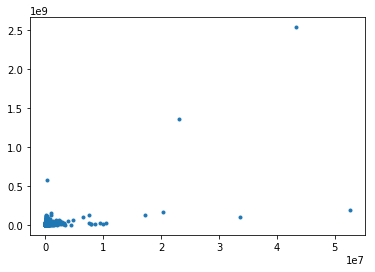

In [10]:
plt.plot(data_4.LotArea,data_4.AssessTot,'.')

#### (c).  Build a model : AssessTot=$w_1$*LotArea + $w_2$. Get $w_1$, $w_2$ and $R^2$.  Plot your results together with observations. 

In [11]:
lm1 = smf.ols(formula='AssessTot ~ LotArea', data = data_4).fit()

print("w1 = {}, w2 = {}, R^2 = {}".format(lm1.params[1],lm1.params[0],lm1.rsquared))

w1 = 21.1603050366, w2 = 76868.3913758, R^2 = 0.38447323434


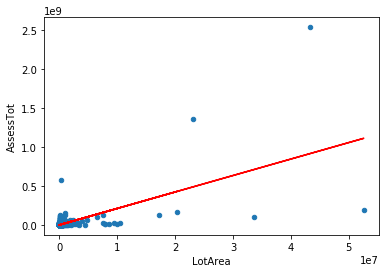

In [12]:
data_4.plot(kind='scatter',x='LotArea',y='AssessTot')
plt.plot(data_4.LotArea,lm1.predict(),'r-')

#### (d) Repeat (c) without intercept, i.e. with $w_2=0$.

In [13]:
lm2 = smf.ols(formula='AssessTot ~ LotArea-1', data = data_4).fit()
#lm2.params[0]
print("w1 = {}, R^2 = {}".format(lm2.params[0],lm2.rsquared))

w1 = 21.1739954474, R^2 = 0.384928026064


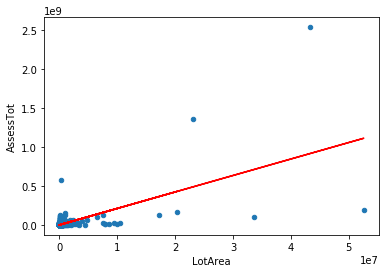

In [14]:
data_4.plot(kind='scatter',x='LotArea',y='AssessTot')
plt.plot(data_4.LotArea,lm2.predict(),'r-')

### Question (5): (20pt)

For the same data as above try the model: log_AssessTot=$w_1$*log_LotArea + $w_2$. Get $w_1$, $w_2$ and $R^2$.  And plot your results together with observations. Explain the result - what does the estimated "$w_1$" means to you?

In [15]:
data_4['logAssessTot'] = np.log(data_4['AssessTot'])
data_4['logLotArea'] = np.log(data_4['LotArea'])

lm3 = smf.ols(formula='logAssessTot ~ logLotArea', data = data_4).fit()

print("w1 = {}, w2 = {}, R^2 = {}".format(lm3.params[1],lm3.params[0],lm3.rsquared))

w1 = 1.32497333191, w2 = 0.208793957478, R^2 = 0.490706561371


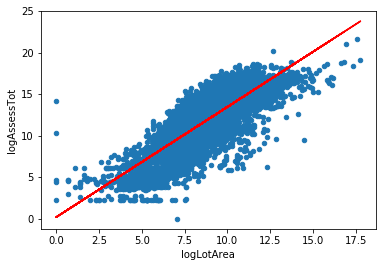

In [16]:
data_4.plot(kind='scatter',x='logLotArea',y='logAssessTot')
plt.plot(data_4.logLotArea,lm3.predict(),'r-')

### w1 is the slope of the model. When slope is too large (like 21), it's difficult for us to see the distribution of samples because the line is so close to x axis. After log the x and the y, the slope changes from 21 to 1.3, which make the distribution more clear.

### Because of Log-transformed x and y, now w1 is the percent change in y (the dependent variable), while x (the independent variable) increases by one percent.